In [37]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
from scipy.stats import norm, uniform, gamma, poisson, binom, bernoulli
from scipy.stats import t


### 1. Import Data

In [3]:
df_ori = pd.read_csv('nyc-rolling-sales.csv')

df = df_ori.copy()
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### 2. Dataset information and null data checking

In [17]:
# general info
#df.info()

#null values checking
for i in df:
    if i == None:
        number_null = data.isnull().sum()
        print(number_null)
    else:
        break
print(f' YUNUS Congratullation!! There are no null value in your data')

 YUNUS Congratullation!! There are no null value in your data


### 2. General statistical info of the data

In [51]:
# Melihat tipe data dan jumlah nilai unik untuk setiap kolom
for col in df.columns:
    print(f"\nColumns: {col}")
    print(f"Data Type: {df_ori[col].dtype}")
    print(f" Number of unique value: {df_ori[col].nunique()}")


Columns: Unnamed: 0
Data Type: int64
 Number of unique value: 26736

Columns: BOROUGH
Data Type: int64
 Number of unique value: 5

Columns: NEIGHBORHOOD
Data Type: object
 Number of unique value: 254

Columns: BUILDING CLASS CATEGORY
Data Type: object
 Number of unique value: 47

Columns: TAX CLASS AT PRESENT
Data Type: object
 Number of unique value: 11

Columns: BLOCK
Data Type: int64
 Number of unique value: 11566

Columns: LOT
Data Type: int64
 Number of unique value: 2627

Columns: EASE-MENT
Data Type: object
 Number of unique value: 1

Columns: BUILDING CLASS AT PRESENT
Data Type: object
 Number of unique value: 167

Columns: ADDRESS
Data Type: object
 Number of unique value: 67563

Columns: APARTMENT NUMBER
Data Type: object
 Number of unique value: 3989

Columns: ZIP CODE
Data Type: int64
 Number of unique value: 186

Columns: RESIDENTIAL UNITS
Data Type: int64
 Number of unique value: 176

Columns: COMMERCIAL UNITS
Data Type: int64
 Number of unique value: 55

Columns: TOTAL 

In [52]:
# DATA DESCRIBTION
#df.describe() 

#numerical data describtion only
#df.describe(include=[np.number])

# non-numerical data describtion
#df.describe(include=['object'])

# shape
#df.shape

# columns
#df.columns

# Data types
#df.dtypes


### 3. Median Calculation

In [53]:
# numerical columns selection
numeric_cols = df.select_dtypes(include=[np.number])

# Hitung median untuk setiap kolom numerik
median_values = numeric_cols.median()

# Mengganti nilai yang hilang dengan nilai median pada kolom-kolom numerik
df.fillna(median_values, inplace=True)

In [55]:
#incase if there is a null data inside of our data, we can remove the particular row containing null values using the below script
df= df[df['BOROUGH'].notna()]
print(df)

       Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0               4        1  ALPHABET CITY   
1               5        1  ALPHABET CITY   
2               6        1  ALPHABET CITY   
3               7        1  ALPHABET CITY   
4               8        1  ALPHABET CITY   
...           ...      ...            ...   
84543        8409        5        WOODROW   
84544        8410        5        WOODROW   
84545        8411        5        WOODROW   
84546        8412        5        WOODROW   
84547        8413        5        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                 2   
2      07 RENTALS - WALKUP APARTMENTS                                 2   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
...      

### 4. categorical variable distribution

In [57]:
# Hitung distribusi kategori untuk variabel kategorikal
categorical_cols = df.select_dtypes(include='object').columns
print("\nDistribusi kategori untuk variabel kategorikal:")
for col in categorical_cols:
    print("\n", df[col].value_counts())


Distribusi kategori untuk variabel kategorikal:

 NEIGHBORHOOD
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: count, Length: 254, dtype: int64

 BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT 

In [ ]:
# Scatter plot visualization to see correlation of numerical variable relationship
sns.pairplot(df_ori[numeric_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


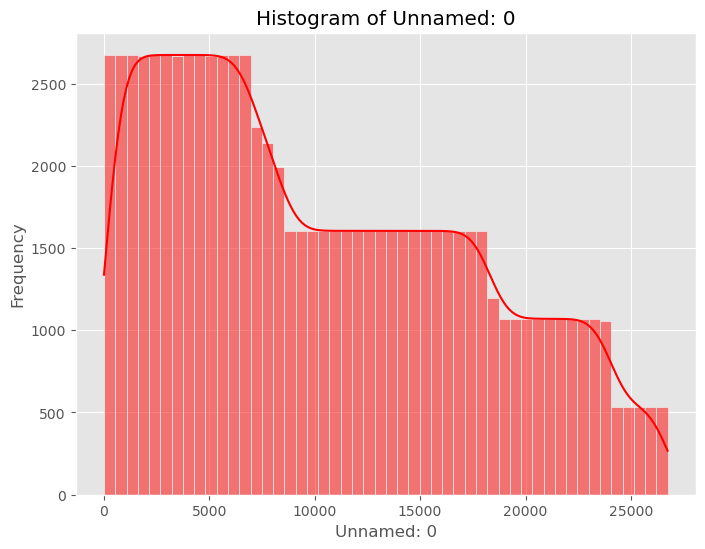

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


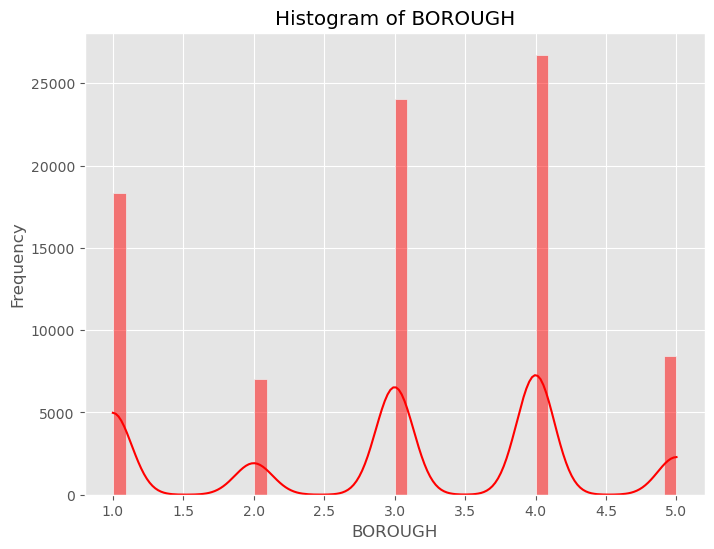

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


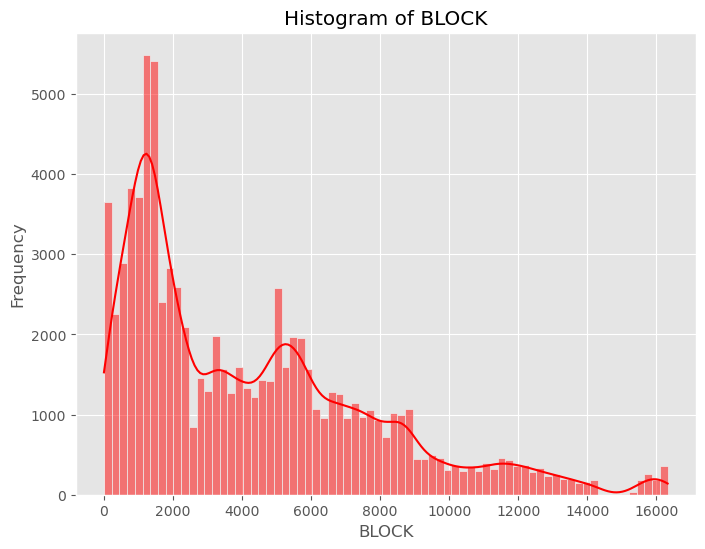

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


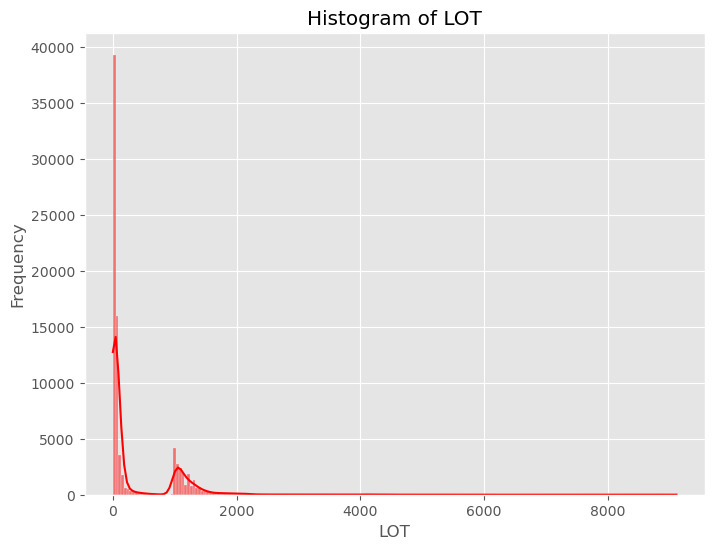

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


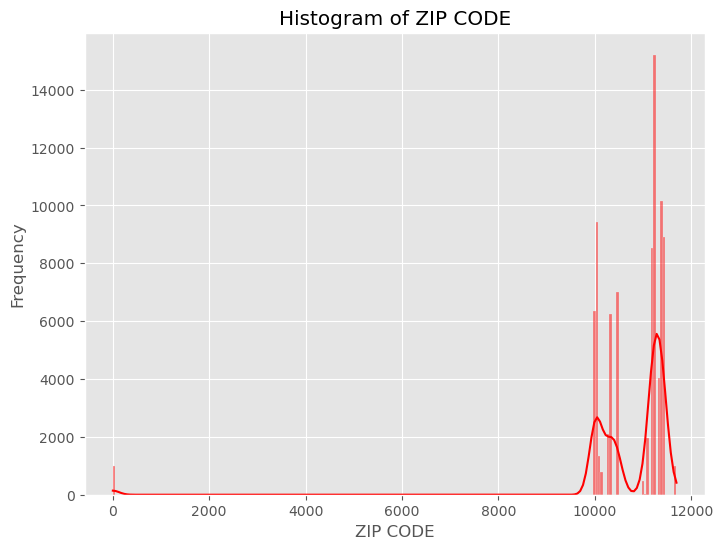

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


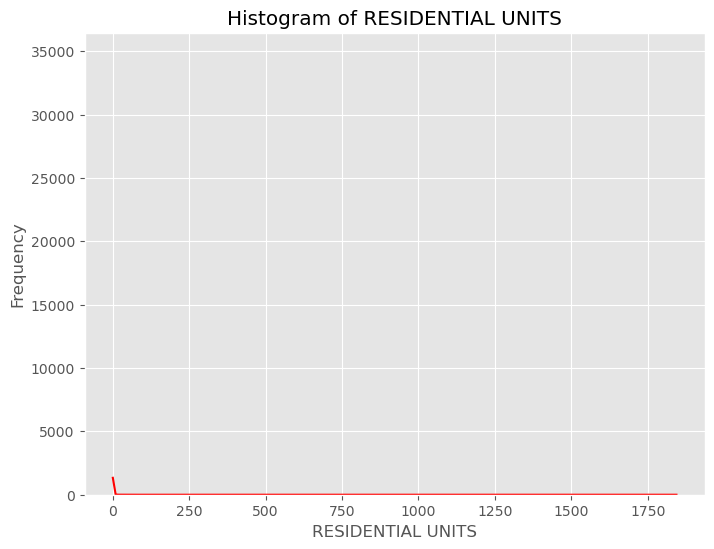

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


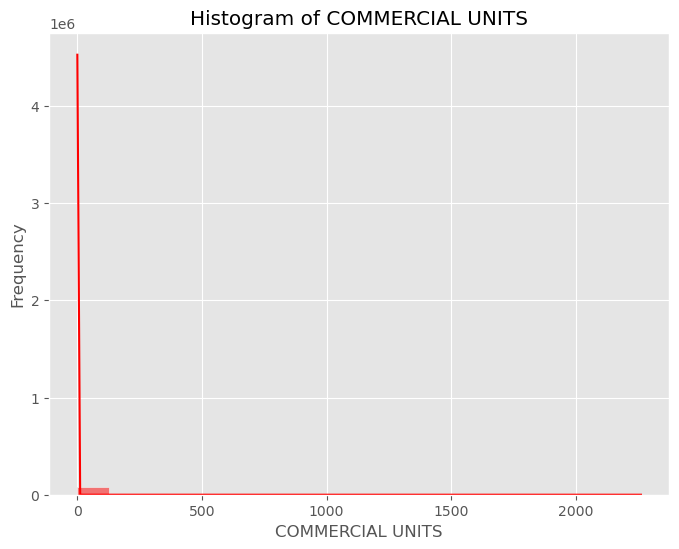

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


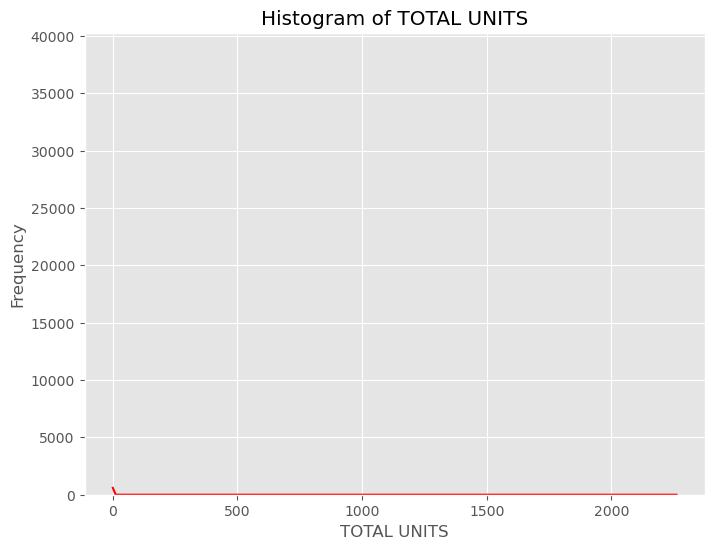

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


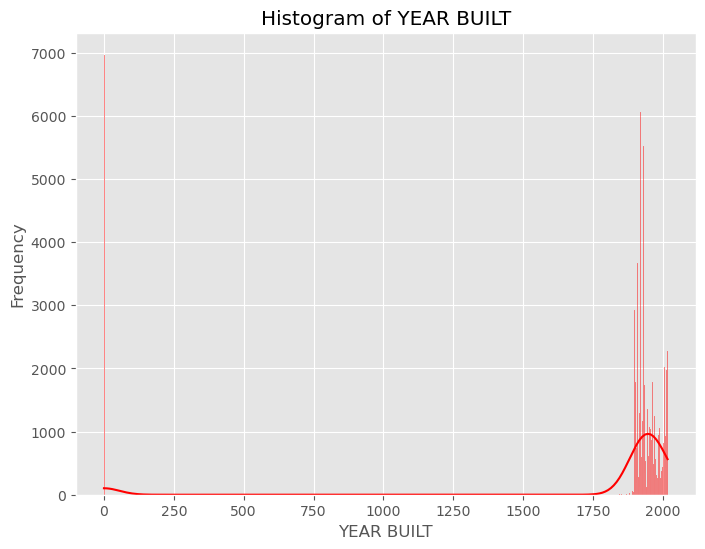

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


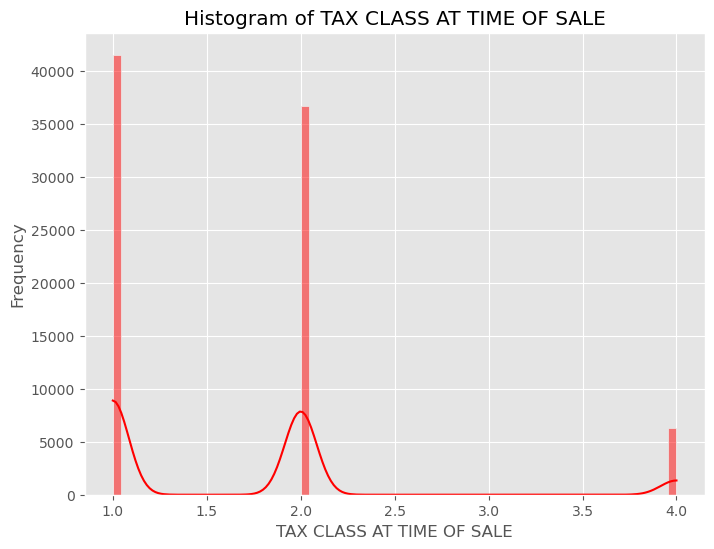

In [58]:
# Histogram plot of numerical variable
coba_numeric_cols = df.select_dtypes(include='number').columns
# using the style for the plot 
plt.style.use('ggplot') 

#figure plot
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='red',)
    plt.title(f'Histogram of {col}'),
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [32]:

# distribution estimation in categorical variable
categorical_cols = df.select_dtypes(include='object').columns
print("\nDistribusi kategori untuk variabel kategorikal:")
for col in categorical_cols:
    print("\n", df[col].value_counts())


Distribusi kategori untuk variabel kategorikal:

 NEIGHBORHOOD
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: count, Length: 254, dtype: int64

 BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT 

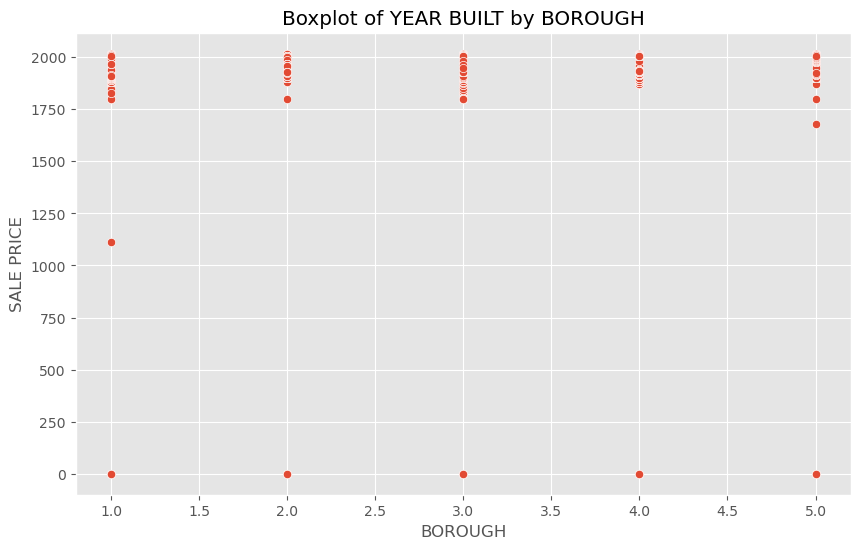

In [35]:
# outlier distribution check

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BOROUGH', y='YEAR BUILT', data=df)
plt.title('Boxplot of YEAR BUILT by BOROUGH')
plt.xlabel('BOROUGH')
plt.ylabel('SALE PRICE')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


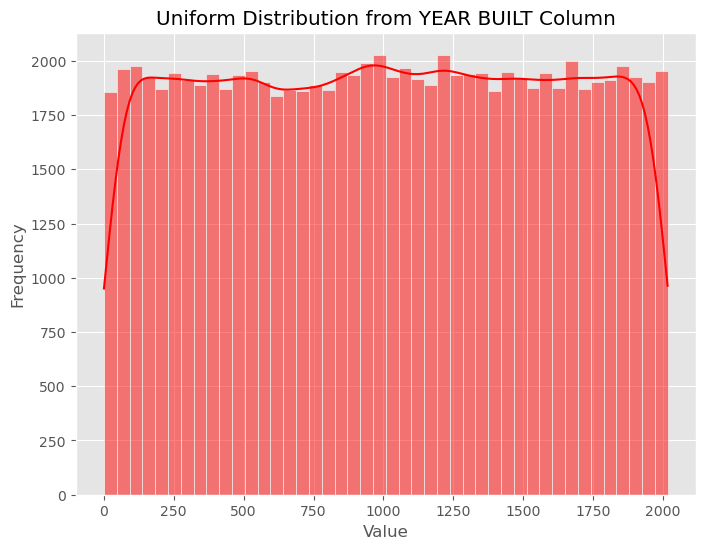

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


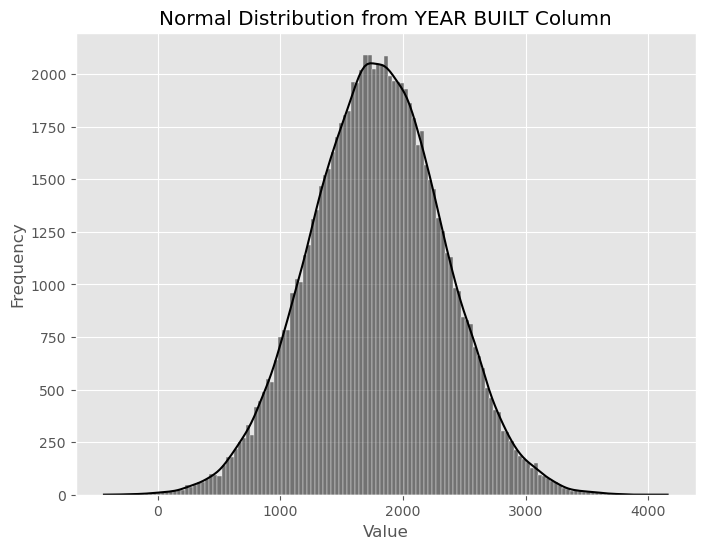

In [64]:
# null value removal
cleaned_data = df['YEAR BUILT'].dropna()

# numerical value check
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# uniform setting
uniform_data = uniform.fit(cleaned_data)

# norm setting
normal_data = norm.fit(cleaned_data)

# uniform distribution
data_uniform = uniform.rvs(size=len(df), loc=uniform_data[0], scale=uniform_data[1])

# normal distribution
data_normal = norm.rvs(size=len(df), loc=normal_data[0], scale=normal_data[1])

# uniform distribution visualization
plt.figure(figsize=(8, 6))
sns.histplot(data_uniform, kde=True, color='red')
plt.title('Uniform Distribution from YEAR BUILT Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# norm distribution visualization
plt.figure(figsize=(8, 6))
sns.histplot(data_normal, kde=True, color='black')
plt.title('Normal Distribution from YEAR BUILT Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


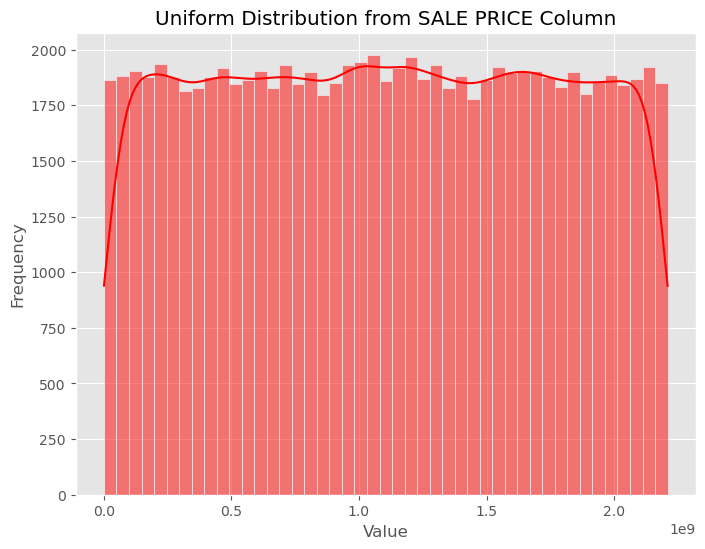

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


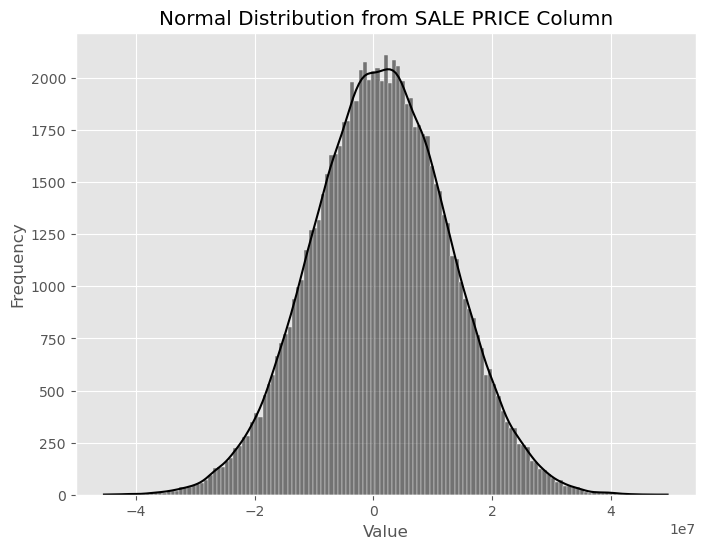

In [63]:
# null removal from "SALE PRICE"
cleaned_data = df['SALE PRICE'].dropna()

# numerical value check
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# uniform 
uniform_data = uniform.fit(cleaned_data)

# normal
normal_data = norm.fit(cleaned_data)

# uniform distribution
data_uniform = uniform.rvs(size=len(df), loc=uniform_data[0], scale=uniform_data[1])

# normal distribution
data_normal = norm.rvs(size=len(df), loc=normal_data[0], scale=normal_data[1])

# Visualisasi distribusi uniform
plt.figure(figsize=(8, 6))
sns.histplot(data_uniform, kde=True, color='red')
plt.title('Uniform Distribution from SALE PRICE Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Visualisasi distribusi normal
plt.figure(figsize=(8, 6))
sns.histplot(data_normal, kde=True, color='black')
plt.title('Normal Distribution from SALE PRICE Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


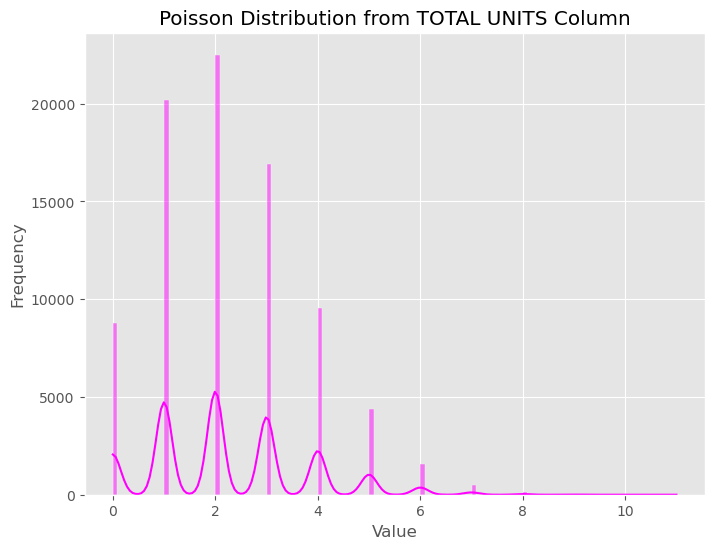

In [65]:
# null removal
cleaned_data = df['TOTAL UNITS'].dropna()

# numerical selection
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# mean
mean_value = cleaned_data.mean()

# possion data
poisson_data = poisson(mu=mean_value)

# possion data distribution
data_poisson = poisson_data.rvs(size=len(df_ori))

# Poisson distribution visualization
plt.figure(figsize=(8, 6))
sns.histplot(data_poisson, kde=True, color='magenta')
plt.title('Poisson Distribution from TOTAL UNITS Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


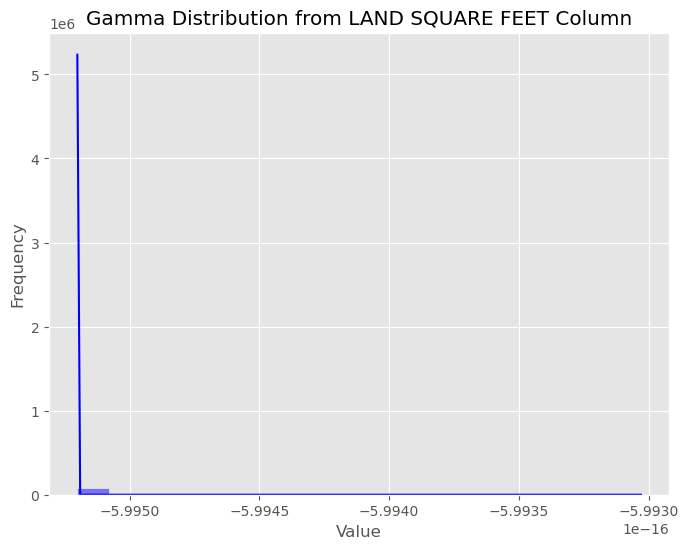

In [66]:
# null removal
cleaned_data = df['LAND SQUARE FEET'].dropna()

# numerical selection data
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# gamma
gamma_data = gamma.fit(cleaned_data)

# gamma distribution setting
data_gamma = gamma.rvs(*gamma_data, size=len(df))

# gamma distirbution visualization
plt.figure(figsize=(8, 6))
sns.histplot(data_gamma, kde=True, color='blue')
plt.title('Gamma Distribution from LAND SQUARE FEET Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


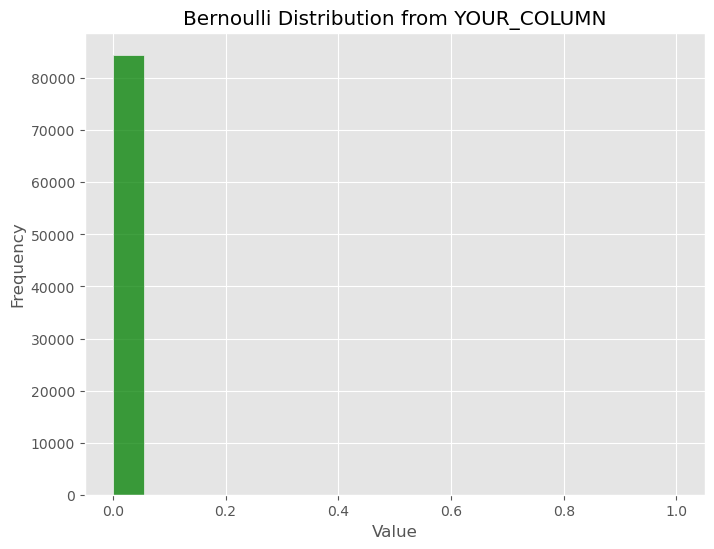

In [67]:
# null value removal
cleaned_data = df['SALE PRICE'].dropna()

# Numerial selection data
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# propability estimation
p = cleaned_data.mean() / cleaned_data.max()  # Misalnya, kita gunakan rata-rata relatif terhadap nilai maksimum

# bernouli setting
bernoulli_data = bernoulli(p=p)

# bernouli distribution
data_bernoulli = bernoulli_data.rvs(size=len(df))

# Bernoulli distribution visualization
plt.figure(figsize=(8, 6))
sns.histplot(data_bernoulli, kde=False, color='green')
plt.title('Bernoulli Distribution from YOUR_COLUMN')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


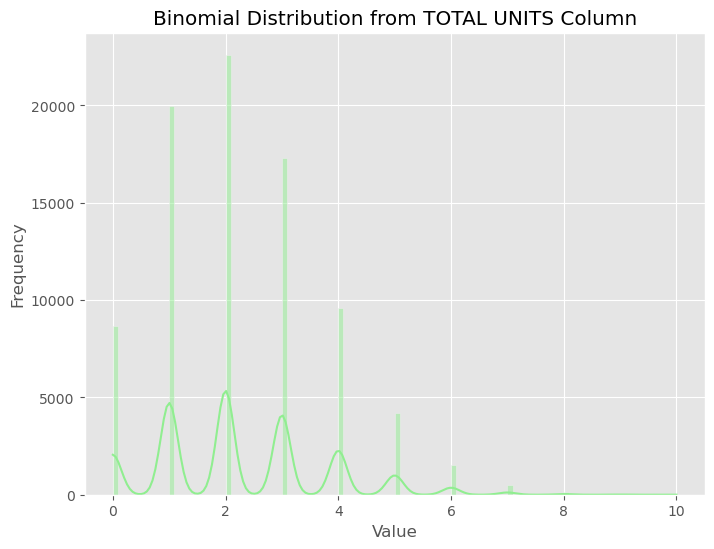

In [68]:
# Null value removal
cleaned_data = df['TOTAL UNITS'].dropna()

# Numerical selection
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# Mean and variance
mean_value = cleaned_data.mean()
variance_value = cleaned_data.var()

# probalitas estimation
n = 100  # arbitrarily input value
p = cleaned_data.mean() / n

# binom setting
binom_data = binom(n=n, p=p)

# data binomial
data_binom = binom_data.rvs(size=len(df))

# Binomial Distribution Visualization
plt.figure(figsize=(8, 6))
sns.histplot(data_binom, kde=True, color='lightgreen')
plt.title('Binomial Distribution from TOTAL UNITS Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()